In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tqdm.notebook import tqdm

In [2]:
from ast import literal_eval

games = pd.read_csv("data/fen_positions.csv")


In [3]:
def convert(l):
    return np.float32([int(i) for i in l.split(',')[1:-1]])

In [4]:
X = games["bitboard"]
X = np.array([ np.array(convert(board)) for board in tqdm(games["bitboard"])])


  0%|          | 0/72766 [00:00<?, ?it/s]

In [5]:
X.shape

(72766, 771)

In [6]:
import tensorflow.keras
from tqdm.notebook import tqdm
from keras import layers, models
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

Y = np.array([[0, 1] if wr<0.5 else [1, 0] for wr in games["winrate"]])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)



In [374]:
print(np.sum(Y == 1), np.sum( Y == 0))

72766 72766


In [375]:
Y.shape

(72766, 2)

In [376]:

from keras import layers, models
from tensorflow.keras import optimizers

input_dim = (128,)

model = models.Sequential()

model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=1e-4), metrics=['acc'])

In [377]:
history = model.fit(
      X_train, Y_train,
      epochs=20,
      validation_split=0.1)

Epoch 1/20
1433/1433 [==============================] - 39s 27ms/step - loss: 0.5053 - acc: 0.7707 - val_loss: 0.4040 - val_acc: 0.8347
Epoch 2/20
1433/1433 [==============================] - 40s 28ms/step - loss: 0.3902 - acc: 0.8280 - val_loss: 0.2629 - val_acc: 0.9048
Epoch 3/20
1433/1433 [==============================] - 41s 28ms/step - loss: 0.3062 - acc: 0.8687 - val_loss: 0.2092 - val_acc: 0.9321
Epoch 4/20
1433/1433 [==============================] - 41s 29ms/step - loss: 0.2572 - acc: 0.8911 - val_loss: 0.1746 - val_acc: 0.9468
Epoch 5/20
1433/1433 [==============================] - 41s 28ms/step - loss: 0.2261 - acc: 0.9056 - val_loss: 0.1464 - val_acc: 0.9495
Epoch 6/20
1433/1433 [==============================] - 41s 29ms/step - loss: 0.2101 - acc: 0.9125 - val_loss: 0.1305 - val_acc: 0.9494
Epoch 7/20
1433/1433 [==============================] - 41s 28ms/step - loss: 0.1917 - acc: 0.9199 - val_loss: 0.1212 - val_acc: 0.9576
Epoch 8/20
1433/1433 [==========================

20 20


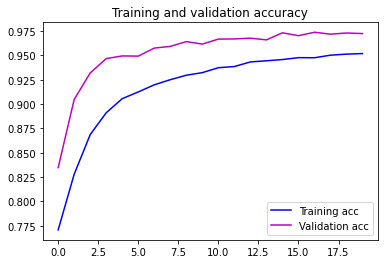

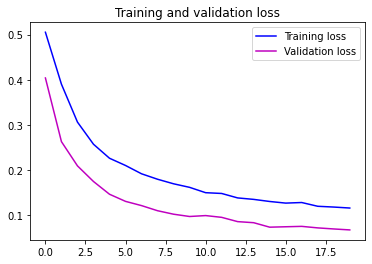

In [378]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(len(acc), len(val_acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'm', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'm', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [385]:
Y_pred = np.argmax(model.predict(X_test), axis=1)

In [389]:
Y_pred

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])

In [393]:
summ=0
for i in range(Y_pred.shape[0]):
    if(Y_test[i][Y_pred[i]]):
        summ+=1
summ

21302

In [394]:
Y_test.shape

(21830, 2)

In [397]:
model.save("models/10k_moves")

INFO:tensorflow:Assets written to: models/10k_moves\assets


INFO:tensorflow:Assets written to: models/10k_moves\assets
